<a href="https://colab.research.google.com/github/Vishant-pal/case_studies/blob/main/Covid_19_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

COVID-19 datasets loading for confirmed cases, deaths, and recoveries.

In [ ]:
confirmed_v1 = pd.read_csv("/content/covid_19_confirmed_v1.csv")
deaths_v1 = pd.read_csv("/content/covid_19_deaths_v1.csv")
recovered_v1 = pd.read_csv("/content/covid_19_deaths_v1.csv")

Make the copies of datasets to work safely on the datasets

In [ ]:
confirmed_cases = confirmed_v1.copy()
death_cases = deaths_v1.copy()
recovered_cases = recovered_v1.copy()

Structure of the datasets as per raws, columns and data types

In [ ]:
print(f'Confirmed cases shape: {confirmed_cases.shape}')
print(f'Death cases shape: {death_cases.shape}')
print(f'Recovered cases shape: {recovered_cases.shape}')

Confirmed cases shape: (276, 498)
Death cases shape: (277, 498)
Recovered cases shape: (277, 498)


Here, I examined each dataset for its shape and I found that we have "276" rows and "498" columns for confirmed_cases dataset,and for death cases we have "277" rows and "498" columns, as well as for recovered cases data set we have "277" rows and "498" colums

Information about all datasets

In [ ]:
print('\nConfirmed cases datypes')
confirmed_cases.dtypes


Confirmed cases datypes


,0
Province/State,object
Country/Region,object
Lat,float64
Long,float64
1/22/20,int64
...,...
5/25/21,int64
5/26/21,int64
5/27/21,int64
5/28/21,int64


In [ ]:
death_cases.columns

Index(['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6',
       'Column7', 'Column8', 'Column9', 'Column10',
       ...
       'Column489', 'Column490', 'Column491', 'Column492', 'Column493',
       'Column494', 'Column495', 'Column496', 'Column497', 'Column498'],
      dtype='object', length=498)

In [ ]:
print('Death cases datypes')
death_cases.dtypes

Death cases datypes


,0
Column1,object
Column2,object
Column3,object
Column4,object
Column5,object
...,...
Column494,object
Column495,object
Column496,object
Column497,object


Change the datatype of columns in apporpariate manner

In [ ]:
#removing header from deaths_cases datset and adding first raw as a header in dataset
death_cases.head(10)
death_cases.columns  = death_cases.iloc[0]
print(f"Now the columns looks like this.. \n{death_cases.columns}")

Now the columns looks like this.. 
Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/20/21', '5/21/21', '5/22/21', '5/23/21', '5/24/21', '5/25/21',
       '5/26/21', '5/27/21', '5/28/21', '5/29/21'],
      dtype='object', name=0, length=498)


Resetting indexes

In [ ]:
death_cases.drop(0)
death_cases = death_cases[1:]
death_cases.reset_index(drop=True, inplace=True)

In [ ]:
death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757


In [ ]:
death_cases["Lat"] = death_cases["Lat"].astype(float)
death_cases["Long"] = death_cases["Long"].astype(float)

<ipython-input-11-803277292>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_cases["Lat"] = death_cases["Lat"].astype(float)
<ipython-input-11-803277292>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_cases["Long"] = death_cases["Long"].astype(float)


In [ ]:
death_cases.dtypes

,0
0,
Province/State,object
Country/Region,object
Lat,float64
Long,float64
1/22/20,object
...,...
5/25/21,object
5/26/21,object
5/27/21,object


In [ ]:
death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757


In [ ]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


In [ ]:
group = confirmed_cases.groupby("Country/Region").sum().iloc[:, 2:].sum(axis=1).sort_values(ascending=False).head(10).index

top 10 Countries as per confirmed cases

In [ ]:
death_cases.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/20/21', '5/21/21', '5/22/21', '5/23/21', '5/24/21', '5/25/21',
       '5/26/21', '5/27/21', '5/28/21', '5/29/21'],
      dtype='object', name=0, length=498)

NameError: name 'df' is not defined

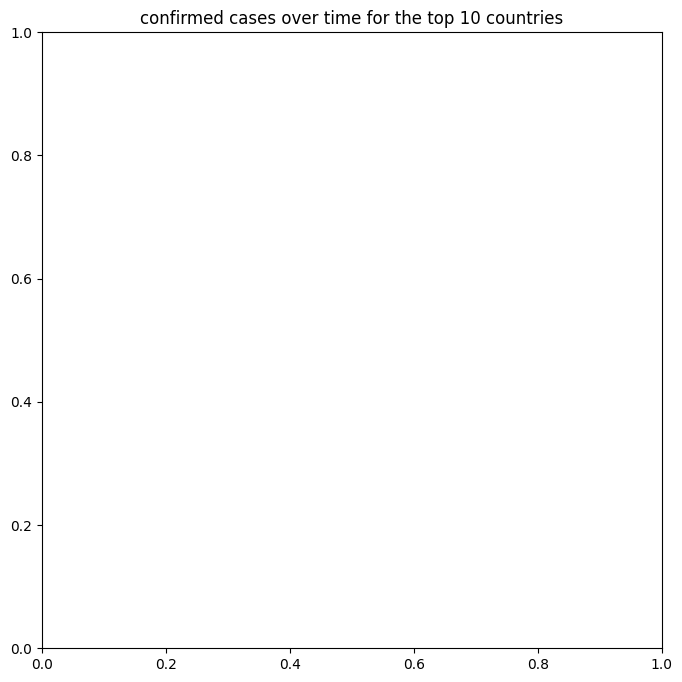

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("confirmed cases over time for the top 10 countries")
plt.plot(death_cases.columns,df['Country/Region'], marker="o")

In [ ]:
death_cases.isnull().sum()

,0
0,
Province/State,190
Country/Region,0
Lat,2
Long,2
1/22/20,0
...,...
5/25/21,0
5/26/21,0
5/27/21,0


In [ ]:
print('Death cases datypes')
death_cases.dtypes

Death cases datypes


,0
0,
Province/State,object
Country/Region,object
Lat,float64
Long,float64
1/22/20,object
...,...
5/25/21,object
5/26/21,object
5/27/21,object


In [ ]:
print("\nConfirmed cases information")
confirmed_cases.info()


Confirmed cases information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(2), int64(494), object(2)
memory usage: 1.0+ MB


In [ ]:
print("\nConfirmed cases information")
death_cases.info()


Confirmed cases information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(2), object(496)
memory usage: 1.0+ MB


In [ ]:
print("\nConfirmed cases information")
recovered_cases.info()


Confirmed cases information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Columns: 498 entries, Column1 to Column498
dtypes: object(498)
memory usage: 1.1+ MB


In [ ]:
confirmed_cases.isnull().sum()

,0
Province/State,190
Country/Region,0
Lat,2
Long,2
1/22/20,0
...,...
5/25/21,0
5/26/21,0
5/27/21,0
5/28/21,0


In [ ]:
death_cases.isnull().sum()

,0
0,
Province/State,190
Country/Region,0
Lat,2
Long,2
1/22/20,0
...,...
5/25/21,0
5/26/21,0
5/27/21,0


In [ ]:
recovered_cases.isnull().sum()

,0
Column1,190
Column2,0
Column3,2
Column4,2
Column5,0
...,...
Column494,0
Column495,0
Column496,0
Column497,0


In [ ]:
t = death_cases.copy()

In [ ]:
t.columns = t.iloc[0]
t2 = t[1:]
t2

,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,42,42,42,42,42,42,42,42,42,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,39,41,42,43,44,44,45,46,47,47
272,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,3448,3452,3459,3459,3470,3480,3483,3483,3489,3492
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1301,1302,1304,1307,1310,1311,1313,1315,1316,1319
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,1265,1266,1267,1268,1271,1271,1273,1275,1275,1276


For analyzing each dataset first few lines we will use .head()

In [ ]:
print("First few raws of confirmed all confirmed cases are : ")

First few raws of confirmed all confirmed cases are : 


In [ ]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


In [ ]:
death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757


In [ ]:
recovered_cases.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column489,Column490,Column491,Column492,Column493,Column494,Column495,Column496,Column497,Column498
0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
1,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
2,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
3,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
4,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
